In [1]:
import pandas as pd
import os

import matplotlib.pyplot as plt
import seaborn as sns

wd_dir = '/Users/jplab/Desktop/DAILY_CODE_DATA/2022-6/data/6-20_Bopened_vs_Bclosed/ncB_vs_ncT/'
os.chdir(wd_dir)

In [2]:
df_open_vs_close = pd.read_excel('/Users/jplab/Desktop/DAILY_CODE_DATA/2022-6/data/6-20_Bopened_vs_Bclosed/ncB_vs_ncT/jasper_ncBpos_vs_ncTpos.xlsx', header=0, index_col=False)
df_open_vs_close.set_index('name', inplace=True)


tag_close = 'T-pos'
tag_open = 'B-pos'
comparasion_tag = 'B-T'


df_closed = df_open_vs_close.loc[df_open_vs_close['tag'] == tag_close]
df_closed[comparasion_tag] = abs(df_closed[comparasion_tag])
df_closed = df_closed.sort_values(by=comparasion_tag, ascending=True)

df_opened = df_open_vs_close.loc[df_open_vs_close['tag'] == tag_open]
df_opened[comparasion_tag] = abs(df_opened[comparasion_tag])
df_opened = df_opened.sort_values(by=comparasion_tag, ascending=False)

# cut low values
df_closed_cut50 = df_closed.tail(50)
df_opened_cut50 = df_opened.head(50)

<ipython-input-2-4e513139f2bf>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_closed[comparasion_tag] = abs(df_closed[comparasion_tag])
<ipython-input-2-4e513139f2bf>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_opened[comparasion_tag] = abs(df_opened[comparasion_tag])


### separate plots

#### set label and title
#### NOTE: need to check order of label and title to fit open or closed tag

In [4]:
# open
ylabel_1 = "Number of TFs bound on B-pos regions"

# closed
ylabel_2 = 'Number of TFs bound on T-pos regions'

Text(0, 0.5, 'Number of TFs bound on T-pos regions')

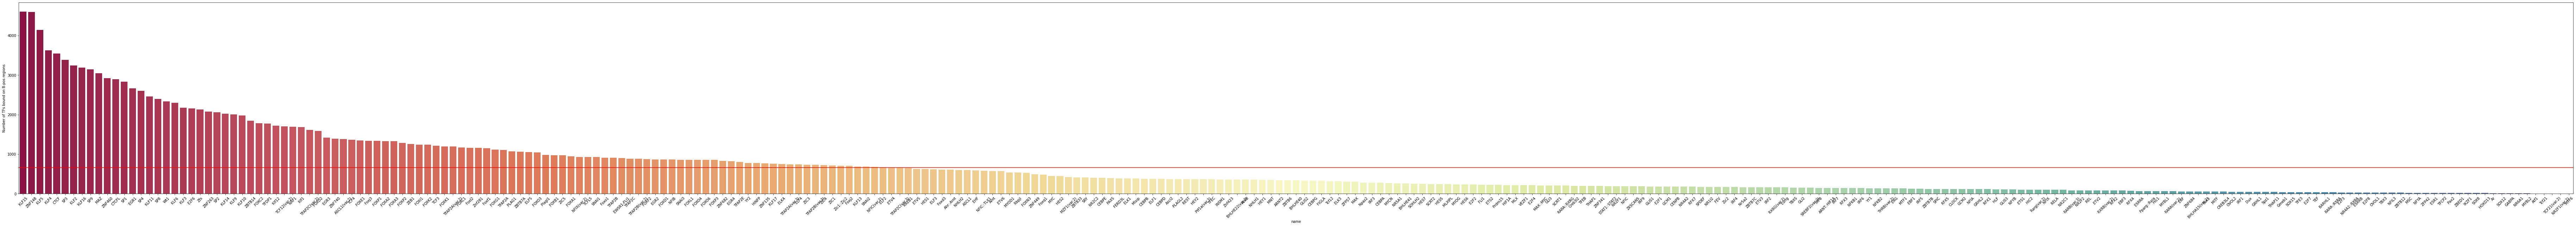

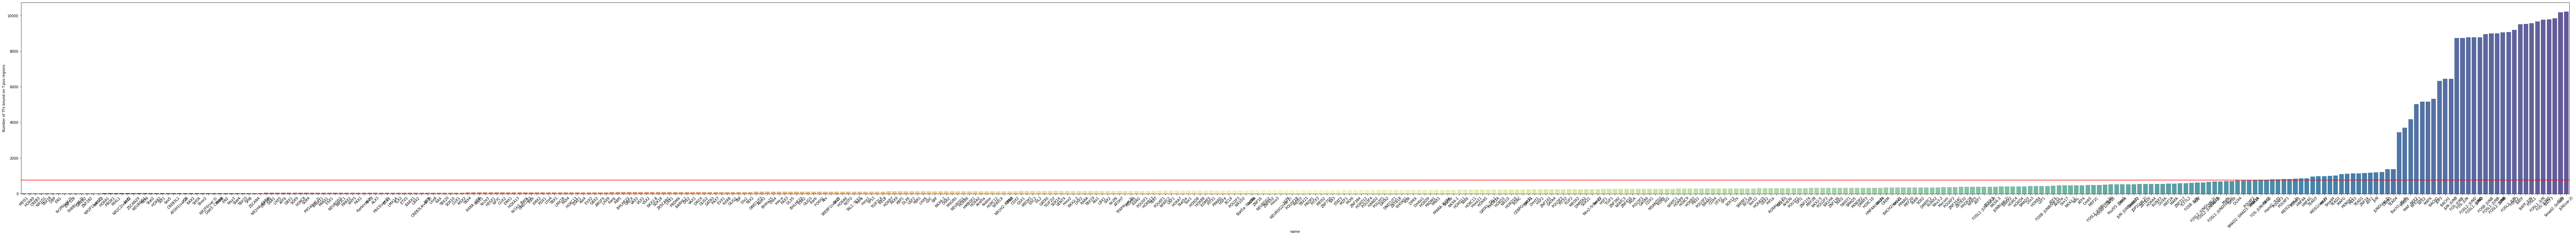

In [5]:
f1, ax_alone1 = plt.subplots(figsize=(130, 10))
ax_alone1 = sns.barplot(x=df_opened.index, y=comparasion_tag, data=df_opened, palette="Spectral")
ax_alone1.tick_params(axis='x', rotation=45)
ax_alone1.axhline(df_opened[comparasion_tag].mean(), color="red", clip_on=False)
ax_alone1.set_ylabel(ylabel_1)

f2, ax_alone2 = plt.subplots(figsize=(130, 10))
ax_alone2 = sns.barplot(x=df_closed.index, y=comparasion_tag, data=df_closed, palette="Spectral")
ax_alone2.tick_params(axis='x', rotation=45)
ax_alone2.axhline(df_closed[comparasion_tag].mean(), color="red", clip_on=False)
ax_alone2.set_ylabel(ylabel_2)

### two in one: all opened and closed

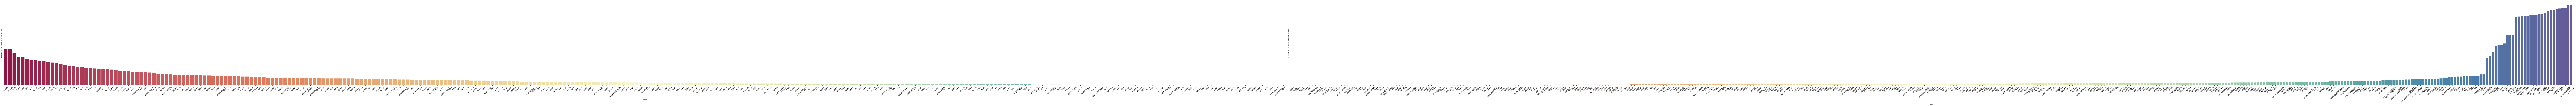

In [6]:
# Set up the matplotlib figure
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(240, 10), sharey=True)

sns.barplot(x=df_opened.index, y=comparasion_tag, data=df_opened, palette="Spectral", ax=ax1)
ax1.tick_params(axis='x', rotation=45,labelsize=12)
ax1.axhline(df_opened[comparasion_tag].mean(), color="red", clip_on=False)
ax1.set_ylabel(ylabel_1)

sns.barplot(x=df_closed.index, y=comparasion_tag, data=df_closed, palette="Spectral", ax=ax2)
ax2.tick_params(axis='x', rotation=45,labelsize=12)
ax2.axhline(df_closed[comparasion_tag].mean(), color="red", clip_on=False)
ax2.set_ylabel(ylabel_2)

sns.despine(bottom=True)
# plt.title("Number of TFs bound on regions OPENED or CLOSED by B1.14")
plt.setp(f.axes, yticks=[])
plt.tight_layout(h_pad=2)

### two in one: cut low values

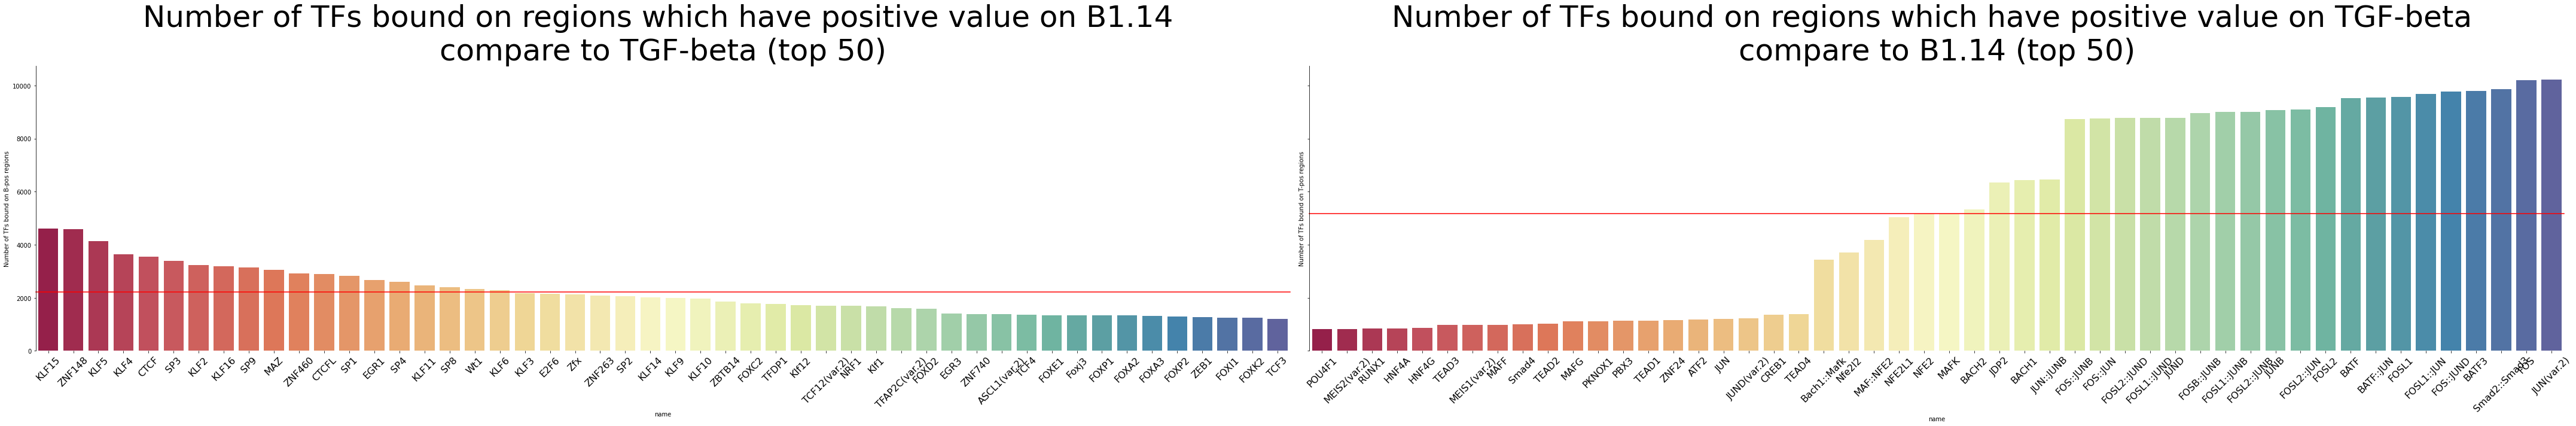

In [9]:
f2, (ax3, ax4) = plt.subplots(1, 2, figsize=(60, 10), sharey=True)

title_1 ='Number of TFs bound on regions which have positive value on B1.14 \ncompare to TGF-beta (top 50)'
sns.barplot(x=df_opened_cut50.index, y=comparasion_tag, data=df_opened_cut50, palette="Spectral", ax=ax3)
ax3.set_title(title_1, fontsize=50)
ax3.tick_params(axis='x', rotation=45,labelsize=16)
ax3.axhline(df_opened_cut50[comparasion_tag].mean(), color="red", clip_on=False)
ax3.set_ylabel(ylabel_1)

title_2 ='Number of TFs bound on regions which have positive value on TGF-beta \ncompare to B1.14 (top 50)'
sns.barplot(x=df_closed_cut50.index, y=comparasion_tag, data=df_closed_cut50, palette="Spectral", ax=ax4)
ax4.set_title(title_2, fontsize=50)
ax4.tick_params(axis='x', rotation=45,labelsize=16)
ax4.axhline(df_closed_cut50[comparasion_tag].mean(), color="red", clip_on=False)
ax4.set_ylabel(ylabel_2)

sns.despine(bottom=True)
# plt.title("Number of TFs bound on regions OPENED or CLOSED by B1.14")
plt.setp(f.axes, yticks=[])
plt.tight_layout(h_pad=2)